In [35]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
data= pd.read_csv('Dataset/Gym_membership.csv')

K -Means => Grouping data into clusters based on similarity
=> divide the data into k clusters,
- each cluster has a center point called a centroid  
- Data points that are closer to a centroid will be assigned to that cluster.

Centroid => the average of the points in a given cluster. 
When a data point is close to the centroid, it's assigned to that cluster

How it works
1. Choose the number of clusters(k), here we use k=3
2. K-Means starts by randomly initializing centroids (or choosing random points as centroids) These centroids will represent the center of each cluster.
3. Then assigns each data point to the closest centroid
(Once the centroids are initialized, the algorithm assigns each data point to the nearest centroid, based on the Euclidean distance.)
4. After all the points have been assigned to clusters, K-Means recalculates the new centroids by taking the average of all points in each cluster. The centroid is now the average position of all points in that cluster.

For each cluster, the mean of all data points in the cluster is computed for each feature. This gives you the new position of the centroid.

5. The algorithm keeps repeating this process—reassigning points to clusters based on proximity to centroids and then recalculating the centroids—until the centroids stop changing or change very little. This means the algorithm has converged and found the final clusters.


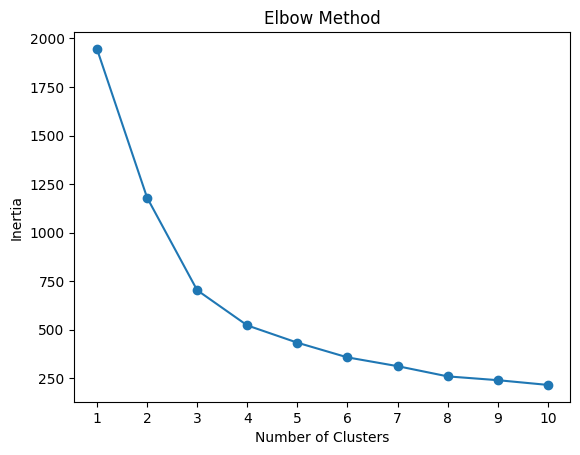

               Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
Cluster                                                               
0        38.255507    73.180617    1.732026  180.264317  143.814978   
1        38.839248    61.106054    1.720877  179.139875  143.803758   
2        38.767790    97.298876    1.717603  180.895131  143.659176   

         Resting_BPM  Session_Duration (hours)  Calories_Burned  \
Cluster                                                           
0          62.621145                  1.660000      1204.559471   
1          62.394572                  1.133027       801.561587   
2          61.576779                  1.134682       837.426966   

         Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  \
Cluster                                                                         
0             15.763436               3.065639                       4.281938   
1             28.682881               2.368894                   

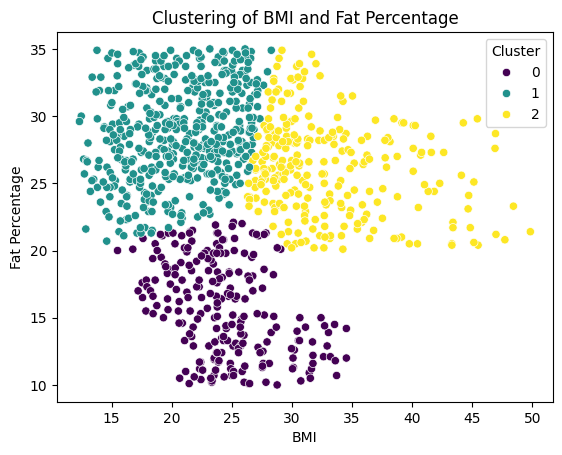

Silhouette Score: 0.4246
Davies-Bouldin Index: 0.8199


In [3]:
# Step 1: Data Preprocessing - Scaling the Data

features = ['BMI', 'Fat_Percentage'] 

# Scale the data for clustering
scaler = StandardScaler() #so that each feature has a mean of 0 and standard deviation 1 (standard normal), 
#basically it will use the formula of X- m/ sd (like z-score)
scaled_data = scaler.fit_transform(data[features])
#here, fit is uses to computes the mean & sd of the feature columns, 
# while transform is to standardizes each data point (x-m/sd)
#as the features are measured in different units or have very different ranges.


# Step 2: Elbow Method to Find the Optimal Number of Clusters
# this to find the suitable number of clusters (k) for K-Means
#Inertia: This is the sum of squared distances between each point 
# Inertia measures how well the data points are clustered around their centroids. 

#inertia is related to how tightly the points are grouped
inertia = [] #list of inertia that will be used to store the inertia values for each value of k (number of clusters)
for k in range(1, 11):  # Trying k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42) #to ensure reproducibility, each time u run the code, the results will be identical
    kmeans.fit(scaled_data) #fit the K-means model on data that alr standardized
    inertia.append(kmeans.inertia_) #.inertia_ is an attribute of the KMeans object that stores the inertia value after the model has been fitted


# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o') #so the x- axis will be numbers from 1-10, representing the number of clusters (k),
# y -axis will be the inertia values which is stored in inertia
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks (range(1,11))
plt.show()


#The inertia will generally decrease as you increase the number of clusters, because adding more clusters can reduce the distance between points and their centroids.
#Inertia is high when k = 1 because all data points are grouped into a single cluster, so the cluster centroid is far away from many of the data points.
#When you increase k from 1 to 2, or from 2 to 3, the inertia will usually drop sharply. This is normal and shows that adding clusters improves the fit (reduces inertia).
# As k continues to increase, the inertia will still decrease but at a slower rate. Eventually, the decrease in inertia will be minimal, and this is where you’ll find the "elbow."
# elbow = where the drop in inertia slows down.

# Step 3: Apply K-Means Clustering (assume k= 3 based on the elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42) #create a KMeans model with 3 clusters, so it will be divided into 3 groups
clusters = kmeans.fit_predict(scaled_data) 
#here fit basically do the steps of Kmeans, (train the model)
#Initialize centroids randomly (based on the random_state you set).
#Assign each data point to the nearest centroid, forming 3 clusters.
#Recalculate the centroids as the mean of all the points assigned to each cluster.
#Repeat steps 2 and 3 until convergence, i.e., until the centroids don't change much anymore.

# After the centroids have been found and the clusters have been defined, 
#will assign each data point to the cluster whose centroid is the closest

# Add cluster labels to your dataframe
data['Cluster'] = clusters

# Step 4: Group by Cluster and Calculate the Mean for Only Numeric Columns
# Select only numeric columns from the DataFrame
numeric_cols = data.select_dtypes(include=['number']).columns

# Group by 'Cluster' and calculate the mean for numeric columns
cluster_means = data[numeric_cols].groupby('Cluster').mean()

# Display the means for each cluster
print(cluster_means)



## Step 5: Reduce Dimensions to 2D using PCA for Visualization
##PCA=> reduce the features into 2
# pca = PCA(n_components=2) #reduce the data into 2 Principal COmponents
# pca_components = pca.fit_transform(scaled_data)

## Create a DataFrame with the PCA components and the cluster labels
# pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
# pca_df['Cluster'] = clusters

## Plot the clusters in 2D using PCA components
# sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
# plt.title('2D PCA of Clusters')
# plt.show()


# Assuming your data already has columns: 'BMI', 'Fat_Percentage' and cluster labels in 'Cluster'
sns.scatterplot(data=data, x='BMI', y='Fat_Percentage', hue='Cluster', palette='viridis')
plt.title('Clustering of BMI and Fat Percentage')
plt.xlabel('BMI')
plt.ylabel('Fat Percentage')
plt.show()

# Silhouette Score
# This is a measure of how well the data points are clustered. The score ranges from -1 to 1, where:
#1 indicates that the points are well clustered.
#0 indicates that the points are on or very close to the decision boundary between clusters.
# Negative values indicate that the points might be assigned to the wrong cluster.
sil_score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

# Davies-Bouldin Index
#The Davies-Bouldin index evaluates the average similarity ratio of each cluster with the cluster that is most similar to it. 
# 
# Lower values of this index indicate better clustering.
db_index = davies_bouldin_score(scaled_data, clusters)
print(f"Davies-Bouldin Index: {db_index:.4f}")


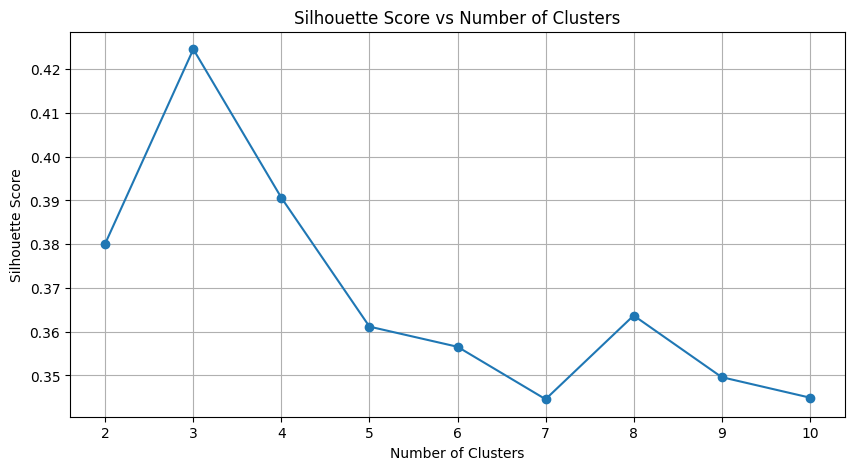

In [4]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Trying different values of k for KMeans (1 to 10 clusters)
inertia = []
sil_scores = []

for k in range(2, 11):  # Start from 2 clusters up to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    
    # Calculate the Silhouette Score for each k
    sil_score = silhouette_score(scaled_data, clusters)
    sil_scores.append(sil_score)
    
    inertia.append(kmeans.inertia_)

# Plot Silhouette Score vs Number of Clusters
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sil_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [5]:
clusters
coba = pd.Series (clusters)
coba.value_counts().sort_index()

0     89
1    143
2     73
3    115
4    123
5     73
6    116
7     96
8    108
9     37
Name: count, dtype: int64

In [6]:
pca_df

NameError: name 'pca_df' is not defined

In [38]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Cluster
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,0
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,2
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,1
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,1
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,1


In [39]:
data.groupby('Cluster')['Workout_Type'].value_counts()

Cluster  Workout_Type
0        Yoga             63
         HIIT             56
         Strength         56
         Cardio           52
1        Strength        137
         Cardio          125
         HIIT            110
         Yoga            107
2        Cardio           78
         Yoga             69
         Strength         65
         HIIT             55
Name: count, dtype: int64

In [37]:
data.groupby('Cluster')['Experience_Level'].value_counts()

Cluster  Experience_Level
0        3                   191
         1                    18
         2                    18
1        2                   245
         1                   234
2        2                   143
         1                   124
Name: count, dtype: int64

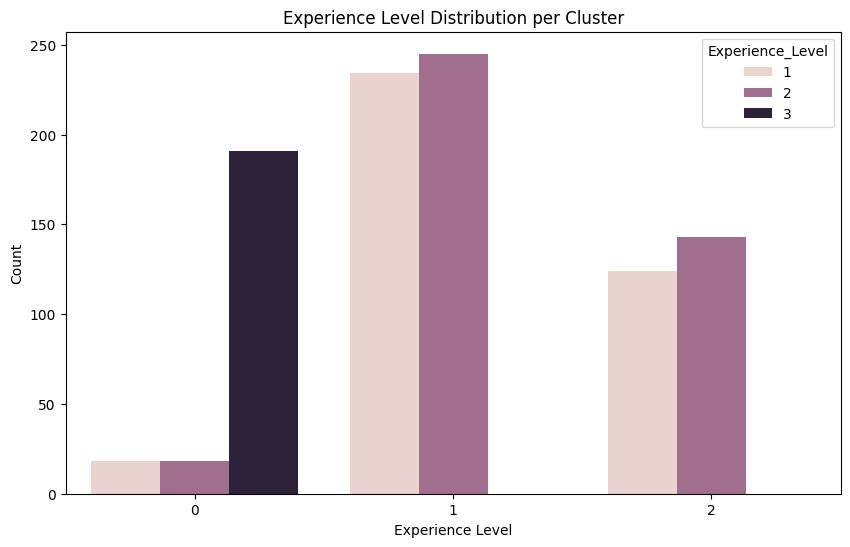

In [42]:
# Group by 'Cluster' and 'Experience_Level', then count the occurrences
experience_cluster = data.groupby('Cluster')['Experience_Level'].value_counts().reset_index(name='count')

# Now experience_cluster is a DataFrame with columns: Cluster, Experience_Level, and count

# Plotting the distribution of Experience Level per Cluster using sns.barplot()
plt.figure(figsize=(10, 6))
sns.barplot(data=experience_cluster, x='Cluster', y='count', hue='Experience_Level')

# Adding labels and title
plt.title('Experience Level Distribution per Cluster')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()


In [48]:
data.groupby(['Cluster', 'Experience_Level','Workout_Type'])['Calories_Burned'].mean()

Cluster  Experience_Level  Workout_Type
0        1                 Cardio           617.000000
                           HIIT             824.250000
                           Strength         830.750000
                           Yoga             846.000000
         2                 Cardio          1185.000000
                           HIIT             925.000000
                           Strength         958.857143
                           Yoga             955.600000
         3                 Cardio          1221.818182
                           HIIT            1289.081633
                           Strength        1288.666667
                           Yoga            1259.716981
1        1                 Cardio           695.449275
                           HIIT             735.115385
                           Strength         756.303030
                           Yoga             684.063830
         2                 Cardio           897.964286
                         

In [51]:
data.groupby('Workout_Type')['Calories_Burned'].mean()

Workout_Type
Cardio      884.513725
HIIT        925.805430
Strength    910.697674
Yoga        903.188285
Name: Calories_Burned, dtype: float64

In [49]:
data.groupby(['Cluster','Experience_Level'])[['Calories_Burned', 'Session_Duration (hours)']].mean()

Calories_Burned  Session_Duration (hours)
Cluster Experience_Level                                           
0       1                      774.166667                  0.989444
        2                      990.000000                  1.277222
        3                     1265.340314                  1.759267
1       1                      719.141026                  1.017094
        2                      880.281633                  1.243755
2       1                      733.088710                  1.000242
        2                      927.902098                  1.251259

In [50]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Cluster
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,0
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,2
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,1
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,1
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,1


In [55]:
data['Workout_Type'].value_counts().sort_index()

Workout_Type
Cardio      255
HIIT        221
Strength    258
Yoga        239
Name: count, dtype: int64

In [64]:
ex= data[data['Experience_Level']==3]
ex.groupby('Workout_Type')[['Calories_Burned','Session_Duration (hours)','BMI','Fat_Percentage']].mean()

,Calories_Burned,Session_Duration (hours),BMI,Fat_Percentage
Workout_Type,,,,
Cardio,1221.818182,1.734091,24.417955,15.002273
HIIT,1289.081633,1.741633,25.411837,13.967347
Strength,1288.666667,1.783778,25.038000,14.904444
Yoga,1259.716981,1.775660,24.160566,15.279245


In [78]:
cok= data[data['Cluster']==0]
abc= cok.groupby('Workout_Type')[['Calories_Burned','Session_Duration (hours)','BMI','Fat_Percentage']].mean()

<Axes: xlabel='BMI', ylabel='Fat_Percentage'>

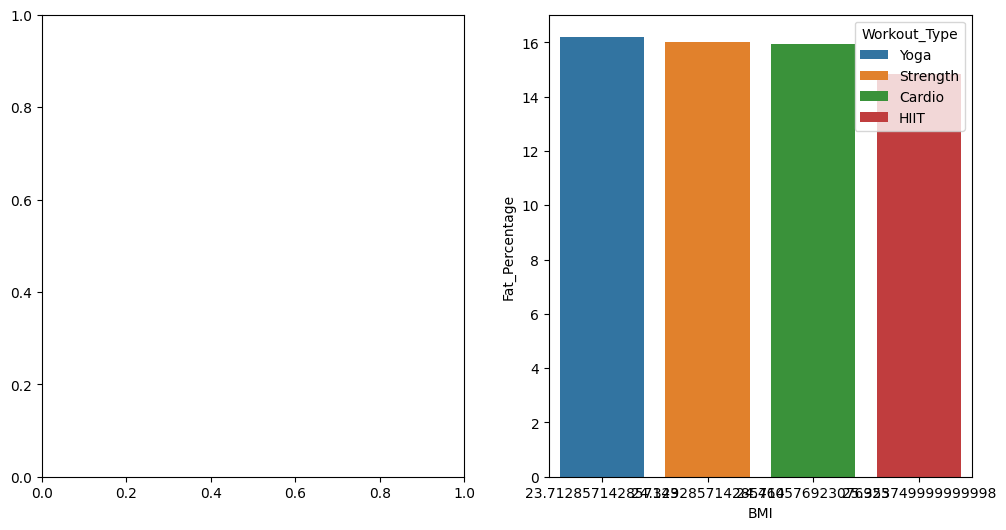

In [82]:
plt.figure (figsize= (10,6))
sns.barplot(data= abc, y= "Fat_Percentage", x='Workout_Type')


In [68]:
apa=cok[cok['Experience_Level'] != 3]

apa.groupby('Workout_Type')[['Calories_Burned','Session_Duration (hours)','BMI','Fat_Percentage']].mean()

,Calories_Burned,Session_Duration (hours),BMI,Fat_Percentage
Workout_Type,,,,
Cardio,830.000000,1.005000,24.695000,21.187500
HIIT,867.428571,1.170000,24.947143,21.028571
Strength,912.272727,1.127273,21.430000,20.500000
Yoga,900.800000,1.217000,21.340000,21.110000
